In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

base = r"F:\school\current\CIS480\data set"

# Load datasets
renter = pd.read_csv(base + r"\renter.csv")
owner = pd.read_csv(base + r"\owner.csv")
population = pd.read_csv(base + r"\population density.csv")
housing_built = pd.read_csv(base + r"\housing Built .csv")
income_median = pd.read_csv(base + r"\income median.csv")

# Rename variable codes (based on your column lists)
renter.rename(columns={"phhro": "Pct_Rent_Burden"}, inplace=True)
owner.rename(columns={"phhoo": "Pct_Owner_Burden"}, inplace=True)
population.rename(columns={"rpopden": "Population_Density"}, inplace=True)
housing_built.rename(columns={"p5cmysb": "Pct_New_Housing"}, inplace=True)
income_median.rename(columns={"mhhinc": "Median_Household_Income"}, inplace=True)


In [ ]:
# Drop unnecessary columns
junk_cols = [
    "GeoID_Description","GeoID_Name","SitsinState","GeoID_Formatted",
    "TimeFrame","GeoVintage","Source","Location"
]

for df in [renter, owner, population, housing_built, income_median]:
    df.drop(columns=[c for c in junk_cols if c in df.columns], inplace=True)

# Merge
merged = renter.merge(owner, on="GeoID", how="left") \
               .merge(population, on="GeoID", how="left") \
               .merge(housing_built, on="GeoID", how="left") \
               .merge(income_median, on="GeoID", how="left")

print("Merged shape:", merged.shape)
# Rename columns for clarity if needed
if "mhhinc" in merged.columns:
    merged.rename(columns={"mhhinc": "Median_Household_Income"}, inplace=True)
    
display(merged.head())

Merged shape: (56, 6)


,GeoID,Pct_Rent_Burden,Pct_Owner_Burden,Population_Density,Pct_New_Housing,Median_Household_Income
0,1,30.07,69.93,99.79,0.10,62027.0
1,2,33.41,66.59,1.29,0.05,89336.0
2,4,33.02,66.98,63.95,0.10,76872.0
3,5,33.86,66.14,58.33,0.15,58773.0
4,6,44.21,55.79,251.78,0.10,96334.0


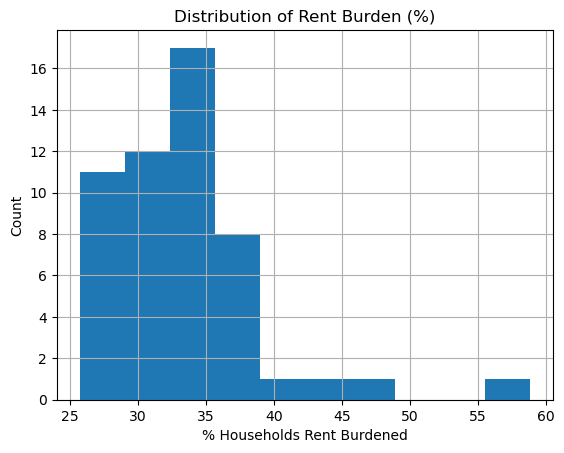

In [ ]:
# Distribution of Rent Burden
plt.figure()
merged["Pct_Rent_Burden"].hist()
plt.title("Distribution of Rent Burden (%)")
plt.xlabel("% Households Rent Burdened")
plt.ylabel("Count")
plt.show()

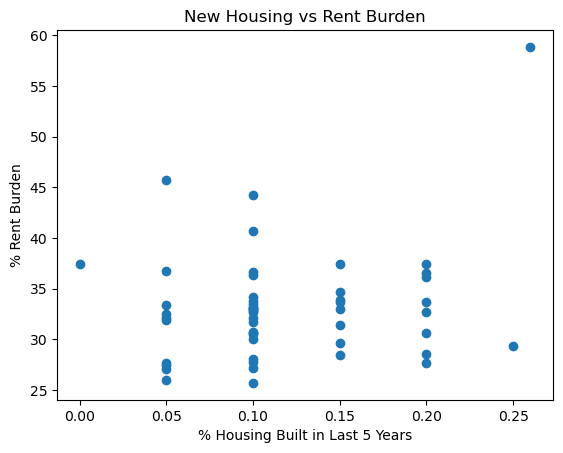

In [ ]:
# Population Density vs Rent Burden
plt.figure()
plt.scatter(merged["Pct_New_Housing"], merged["Pct_Rent_Burden"])
plt.title("New Housing vs Rent Burden")
plt.xlabel("% Housing Built in Last 5 Years")
plt.ylabel("% Rent Burden")
plt.show()

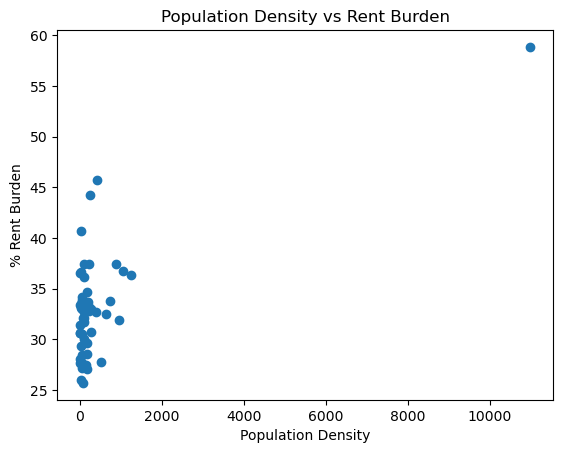

In [ ]:
# Population Density vs Rent Burden
plt.figure()
plt.scatter(merged["Population_Density"], merged["Pct_Rent_Burden"])
plt.title("Population Density vs Rent Burden")
plt.xlabel("Population Density")
plt.ylabel("% Rent Burden")
plt.show()

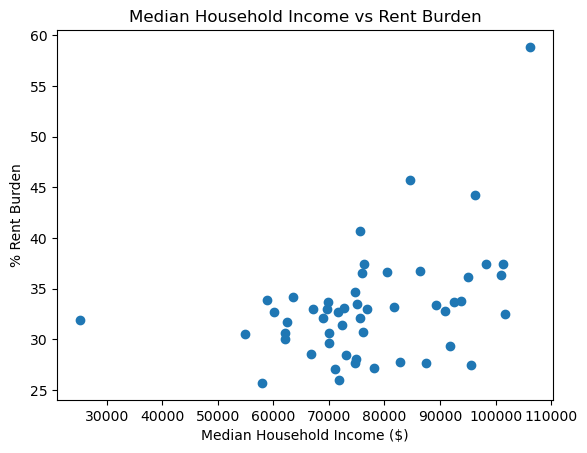

In [ ]:
# Income vs Rent Burden
plt.figure()
plt.scatter(merged["Median_Household_Income"], merged["Pct_Rent_Burden"])
plt.title("Median Household Income vs Rent Burden")
plt.xlabel("Median Household Income ($)")
plt.ylabel("% Rent Burden")
plt.show()

In [ ]:
# export_path = base + r"\merged file.csv"
merged.to_csv(export_path, index=False)

print("✅ Export successful!")
print("File saved to:", export_path)
print("Rows exported:", len(merged))
print("Columns exported:", len(merged.columns))

✅ Export successful!
File saved to: F:\school\current\CIS480\data set\merged file.csv
Rows exported: 56
Columns exported: 6
